In [15]:
import numpy as np
from PIL import Image
import ia870 as MT

In [2]:
a = MT.iatext('0123456789')

In [11]:
g = MT.iabshow(a,a)

In [14]:
g.shape, g.dtype, g.min(), g.max()

((255, 1530), dtype('bool'), False, True)

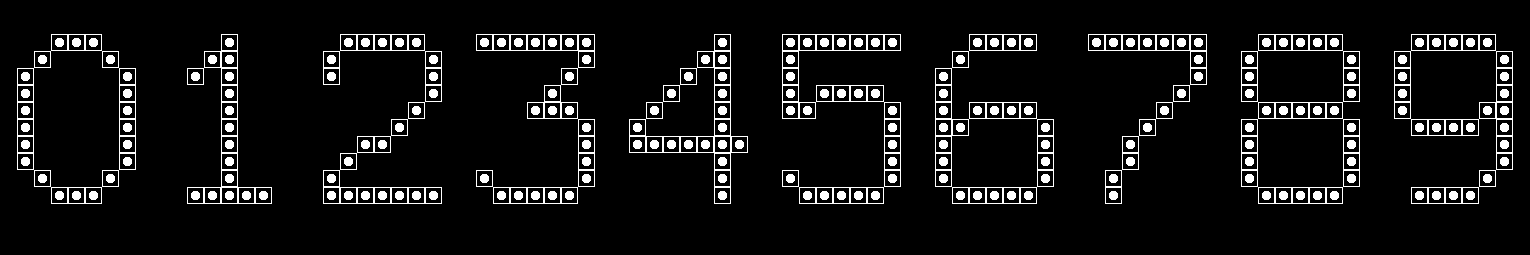

In [13]:
Image.fromarray(g.astype('uint8')*255)

## Caso de matriz espaçamento fixo 5x7

In [45]:
txt = '0123'
FontDft = np.array([[0,0,1,1,1,0,0], # 0
                    [0,1,0,0,1,1,0],
                    [0,1,0,0,1,1,0],
                    [0,1,0,1,0,1,0],
                    [0,1,1,0,0,1,0],
                    [0,1,1,0,0,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,1,0,0,0], # 1
                    [0,0,1,1,0,0,0],
                    [0,0,0,1,0,0,0],
                    [0,0,0,1,0,0,0],
                    [0,0,0,1,0,0,0],
                    [0,0,0,1,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,0,1,1,1,0,0], # 2
                    [0,1,0,0,0,1,0],
                    [0,0,0,0,0,1,0],
                    [0,0,1,1,1,0,0],
                    [0,1,0,0,0,0,0],
                    [0,1,0,0,0,0,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0], # 3
                    [0,1,0,0,0,1,0],
                    [0,0,0,0,1,0,0],
                    [0,0,0,1,1,0,0],
                    [0,0,0,0,0,1,0],
                    [0,1,0,0,0,1,0],
                    [0,0,1,1,1,0,0],
                   ],'bool')
FIRST_CHAR =ord('0')
LAST_CHAR  = ord('3')
N_CHARS    = 1 + LAST_CHAR - FIRST_CHAR
WIDTH_DFT  = 7
HEIGHT_DFT = 7

FontDft = np.reshape(FontDft,(HEIGHT_DFT * N_CHARS, WIDTH_DFT))
y = ()
for c in txt:
  i = ord(c) - FIRST_CHAR
  assert i < N_CHARS,'iatext, code not allowed (%s)' % c
  if len(y) == 0:
    y = FontDft[i*HEIGHT_DFT:(i+1)*HEIGHT_DFT,:]
  else:
    y = MT.iaconcat('w',y,FontDft[i*HEIGHT_DFT:(i+1)*HEIGHT_DFT,:])

y.shape

(7, 28)

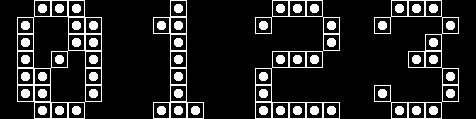

In [46]:
Image.fromarray(MT.iabshow(y,y).astype('uint8')*255)